# Health Insurance Claims Exploratory Data Analysis

In [2]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
insurance_csv = pd.read_csv("insurance_claims.csv")
print(f"Rows: {insurance_csv.shape[0]}")
print(f"Columns: {insurance_csv.shape[1]}")
insurance_csv.info()

Rows: 1338
Columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_csv.describe(include='all')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


statement on how data looks before analysis

<Figure size 1000x1000 with 0 Axes>

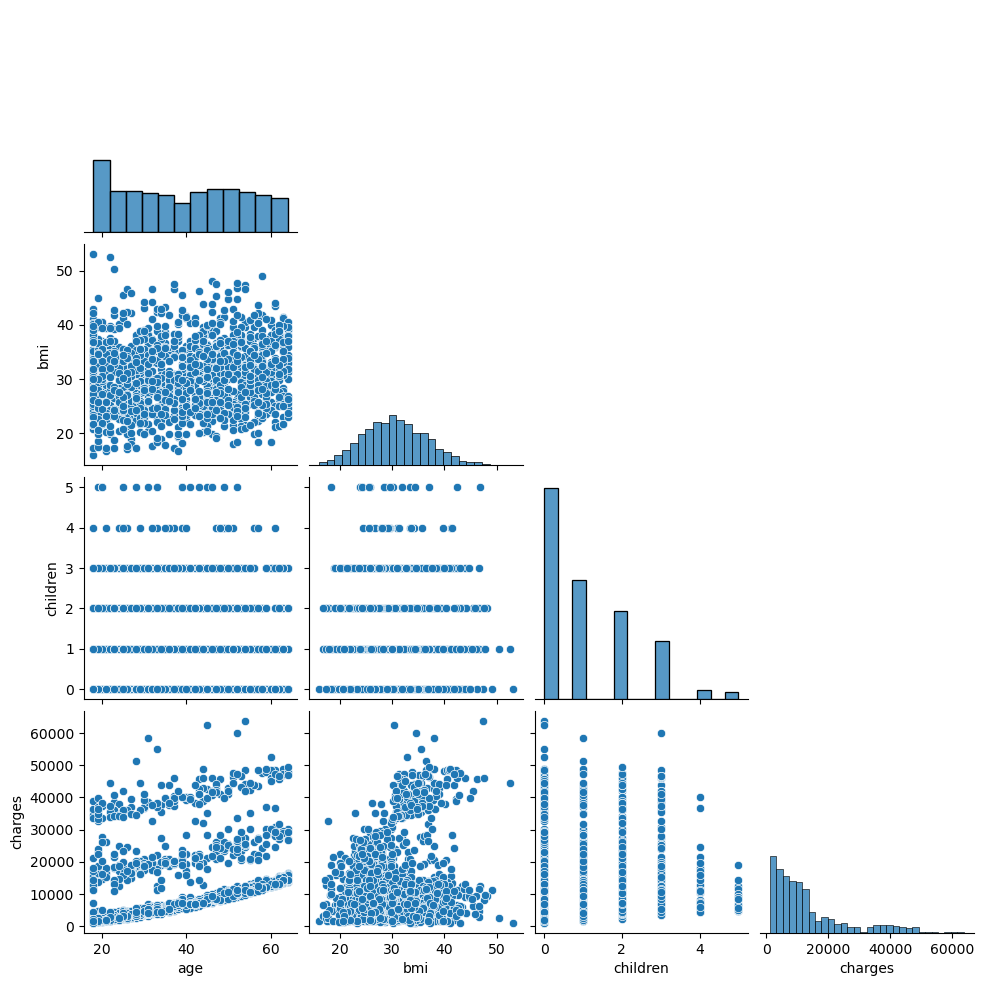

In [25]:
plt.figure(figsize=(10, 10))
sns.pairplot(insurance_csv, diag_kind='hist', corner=True)

statement on how most plots look normal except for age vs charges

<Figure size 1000x800 with 0 Axes>

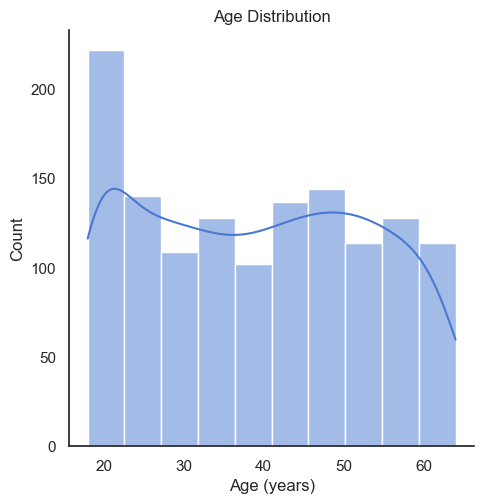

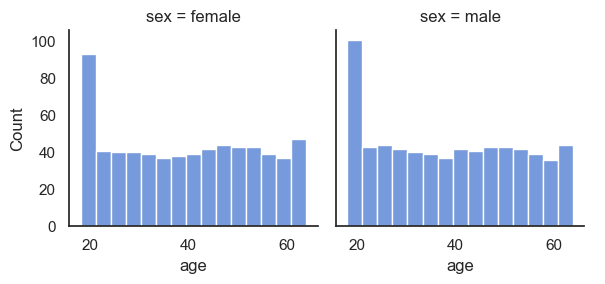

In [93]:
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['age'], bins = 10, color = 'b', kde = True)
plt.title("Age Distribution")
plt.xlabel('Age (years)')
plt.ylabel('Count')

g = sns.FacetGrid(insurance_csv, col='sex')
g.map(sns.histplot, 'age', bins=15)
g.add_legend()

analysis about how male and female distribution across ages is almost identical

Slope: 257.72
Intercept: $3165.89


Text(11.750000000000002, 0.5, 'Cost ($)')

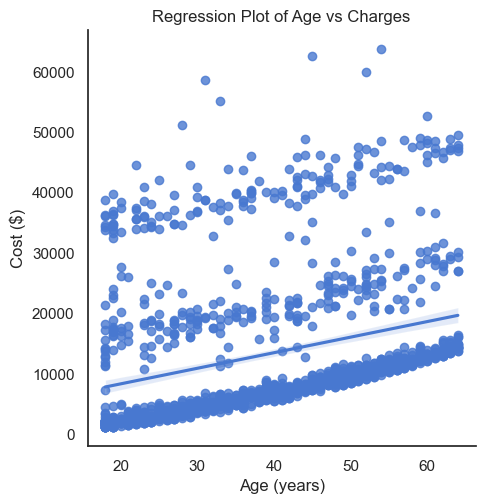

In [94]:
# Linear Regression
age_model = LinearRegression()
age_model.fit(insurance_csv[['age']], insurance_csv['charges'])
age_slope = age_model.coef_[0]
age_intercept = age_model.intercept_

print(f"Slope: {age_slope:.2f}")
print(f"Intercept: ${age_intercept:.2f}")

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True)
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')

Male slope: 260.68
Female slope: 257.01
Difference: 3.67
Male intercept: $3811.77
Female intercept: $2416.85
Difference: $1394.93


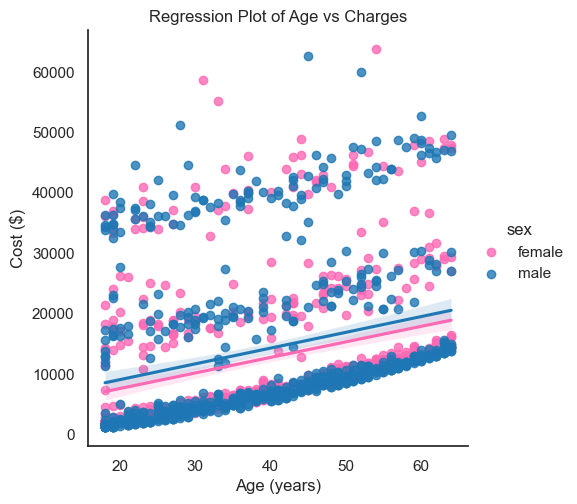

In [83]:
# Separate data by sex
male_data = insurance_csv[insurance_csv['sex'] == 'male']
female_data = insurance_csv[insurance_csv['sex'] == 'female']

# Fit regression models
male_model = LinearRegression()
female_model = LinearRegression()

male_model.fit(male_data[['age']], male_data['charges'])
female_model.fit(female_data[['age']], female_data['charges'])

# Get slopes and y-intercepts
male_slope = male_model.coef_[0]
male_intercept = male_model.intercept_
female_slope = female_model.coef_[0]
female_intercept = female_model.intercept_

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='sex', palette={'male': '#1f77b4', 'female': '#ff69b4'})
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')

print(f"Male slope: {male_slope:.2f}")
print(f"Female slope: {female_slope:.2f}")
print(f"Difference: {abs(male_slope - female_slope):.2f}")

print(f"Male intercept: ${male_intercept:.2f}")
print(f"Female intercept: ${female_intercept:.2f}")
print(f"Difference: ${abs(male_intercept - female_intercept):.2f}")

Text(51.420638888888874, 0.5, 'Cost ($)')

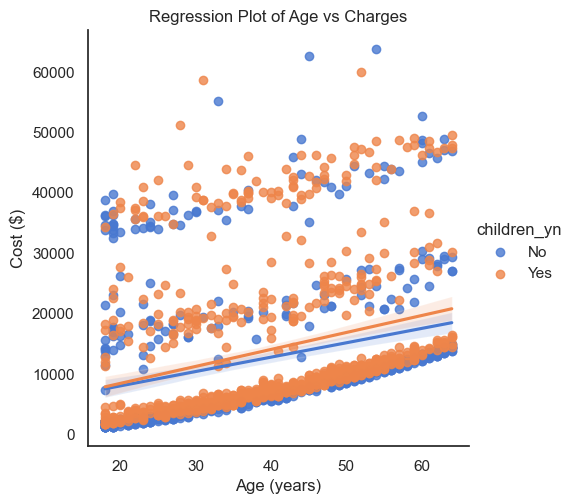

In [89]:
insurance_csv['children_yn'] = insurance_csv['children'].apply(lambda x: 'Yes' if x >= 1 else 'No')

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='children_yn')
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')